# Supervised Machine Learning
ML to predict future housing prices in cities listed in DataFrame

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

## Retrieve the Data
The cleaned data file is located under the Resources folder and named sale_price_clean.csv

In [5]:
# Import the data using Pandas. 
house_price = "../Resources/housing_clean.csv"

In [6]:
# Display the resulting DataFrame to confirm the import was successful.
house_price_df = pd.read_csv(house_price, encoding="ISO-8859-1")
house_price_df.head()

,price,area,bedrooms,bathrooms,stories,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,9100000,6000,4,1,2,no,yes,no,no,2,no
1,9100000,6600,4,2,2,yes,yes,no,yes,1,yes
2,8960000,8500,3,2,4,no,no,no,yes,2,no
3,8890000,4600,3,2,2,yes,no,no,yes,2,no
4,8855000,6420,3,2,2,no,no,no,yes,1,yes


## Split the Data into Training and Testing Sets

In [8]:
house_price_df.dtypes

price               int64
area                int64
bedrooms            int64
bathrooms           int64
stories             int64
guestroom          object
basement           object
hotwaterheating    object
airconditioning    object
parking             int64
prefarea           object
dtype: object

In [9]:
house_price_df.shape

(530, 11)

In [10]:
# To see unique categories in a categorical column
# print(house_price_df.area.unique())

In [11]:
for col in house_price_df.columns:
    attName = col
    dType = house_price_df[col].dtype
    missing = pd.isnull(house_price_df[col]).any()
    uniqueCount = len(house_price_df[attName].value_counts(normalize=False))
# discretize (create dummies for datatypes that are objects)
    if dType == object:
        house_price_df = pd.concat([house_price_df, pd.get_dummies(house_price_df[col], prefix=col)], axis=1)
        del house_price_df[attName]


In [12]:
# Verify data types have been updated
house_price_df.dtypes

price                  int64
area                   int64
bedrooms               int64
bathrooms              int64
stories                int64
parking                int64
guestroom_no           uint8
guestroom_yes          uint8
basement_no            uint8
basement_yes           uint8
hotwaterheating_no     uint8
hotwaterheating_yes    uint8
airconditioning_no     uint8
airconditioning_yes    uint8
prefarea_no            uint8
prefarea_yes           uint8
dtype: object

In [13]:
# Preview updated DataFrame
house_price_df.head()

,price,area,bedrooms,bathrooms,stories,parking,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes
0,9100000,6000,4,1,2,2,1,0,0,1,1,0,1,0,1,0
1,9100000,6600,4,2,2,1,0,1,0,1,1,0,0,1,0,1
2,8960000,8500,3,2,4,2,1,0,1,0,1,0,0,1,1,0
3,8890000,4600,3,2,2,2,0,1,1,0,1,0,0,1,1,0
4,8855000,6420,3,2,2,1,1,0,1,0,1,0,0,1,0,1


In [14]:
house_price_df.shape

(530, 16)

In [15]:
# Define the X (features) and y (target) sets
y = house_price_df["price"].values
X = house_price_df.drop(["price"], axis=1)


In [16]:
# Split the data into X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [17]:
X_test

,area,bedrooms,bathrooms,stories,parking,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes
140,6100,3,2,1,2,1,0,0,1,1,0,1,0,0,1
398,1950,3,2,2,0,1,0,0,1,1,0,1,0,0,1
6,7155,3,2,1,2,0,1,0,1,1,0,0,1,1,0
334,4820,3,1,2,0,1,0,1,0,1,0,1,0,1,0
322,2145,4,2,1,0,1,0,0,1,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,7000,3,1,1,3,1,0,1,0,1,0,1,0,1,0
464,3660,4,1,2,0,1,0,1,0,1,0,1,0,1,0
360,5960,3,1,2,0,0,1,0,1,1,0,1,0,1,0
508,2787,4,2,2,0,1,0,1,0,1,0,1,0,1,0


In [18]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(397, 15) (133, 15) (397,) (133,)


## Create, Fit and Compare Models

In [19]:
# Creating the Linear Regression model
model_LR = LinearRegression()

# Fit the model to the training data, and calculate the scores for the training and testing data.
model_LR.fit(X_train, y_train)
training_score = model_LR.score(X_train, y_train)
testing_score = model_LR.score(X_test, y_test)

In [20]:
# Print the training score and test score
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.6505806178323821
Testing Score: 0.6127791461976442


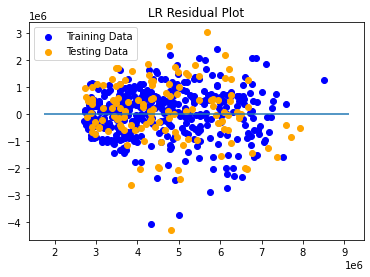

In [21]:
# Plot the residuals for the training and testing data.
plt.scatter(model_LR.predict(X_train), model_LR.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model_LR.predict(X_test), model_LR.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("LR Residual Plot")
plt.show()

In [22]:
# Predict the prices on the test data
y_pred = model_LR.predict(X_test)
print(y_pred[:10])

[5835436.36985725 4981832.38702519 6659603.80908037 3682422.38447704
 4702207.88434263 6045955.34626264 4312584.82033119 2907465.72223387
 2902839.61769892 6082114.9190896 ]


In [23]:
# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 1214291982673.2424


In [24]:
# Calculate the r2 score
r2_score(y_test, y_pred)

0.6127791461976442

In [25]:
# Creating the Random Forest Regressor model
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
RFmodel = RandomForestRegressor(random_state=1, max_depth=10)

# fitting the model
RFmodel.fit(X_train,y_train)

# make predictions
y_pred = RFmodel.predict(X_test)


Training Score: 0.926347053891752
Testing Score: 0.6006523501226713


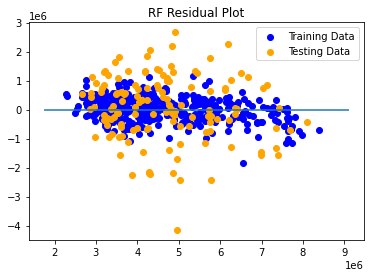

In [26]:
training_score = RFmodel.score(X_train, y_train)
testing_score = RFmodel.score(X_test, y_test)
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

# Plot the residuals for the training and testing data.
plt.scatter(RFmodel.predict(X_train), RFmodel.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(RFmodel.predict(X_test), RFmodel.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("RF Residual Plot")
plt.show()

In [27]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()  
X_train_scaled = sc.fit_transform(X_train)  
X_test_scaled = sc.transform(X_test)


In [28]:
# Creating the Linear Regression model after feature scaling
LRmodel = LinearRegression()

# Fit the model to the training data, and calculate the scores for the training and testing data.
LRmodel.fit(X_train_scaled, y_train)
training_score = LRmodel.score(X_train_scaled, y_train)
testing_score = LRmodel.score(X_test_scaled, y_test)

In [29]:
# Print training and test score for Linear Regression model
print(training_score, testing_score)

0.6505806178323821 0.6127791461976426


In [30]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Creating an SVR model
SVRmodel = SVR()

# Fit the model to the training data, and calculate the scores for the training and testing data.
SVRmodel.fit(X_train_scaled, y_train)
training_score = SVRmodel.score(X_train_scaled, y_train)
testing_score = SVRmodel.score(X_test_scaled, y_test)


In [31]:
# Print training and test score for SVR model
print(training_score, testing_score)

-0.03936311338623799 -0.023407203203946292


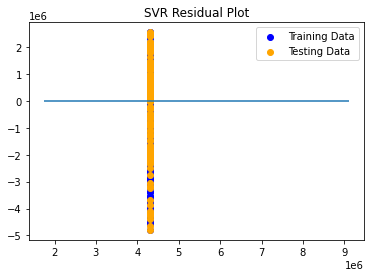

In [32]:
# Plot the residuals for the training and testing data.
plt.scatter(SVRmodel.predict(X_train_scaled), SVRmodel.predict(X_train_scaled) - y_train, c="blue", label="Training Data")
plt.scatter(SVRmodel.predict(X_test_scaled), SVRmodel.predict(X_test_scaled) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("SVR Residual Plot")
plt.show()

In [33]:
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor

# Create a Gradiant Boosting Regressor model with default settings
GBRmodel = ensemble.GradientBoostingRegressor(random_state=0)

# Fit the model to the training data, and calculate the scores for the training and testing data.
GBRmodel.fit(X_train_scaled, y_train)
training_score = GBRmodel.score(X_train_scaled, y_train)
testing_score = GBRmodel.score(X_test_scaled, y_test)

In [34]:
# Print training and test score for GBR model
print(training_score, testing_score)

0.8416842453540093 0.6066228026028424


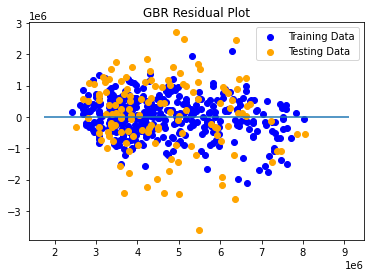

In [35]:
# Plot the residuals for the training and testing data.
plt.scatter(GBRmodel.predict(X_train_scaled), GBRmodel.predict(X_train_scaled) - y_train, c="blue", label="Training Data")
plt.scatter(GBRmodel.predict(X_test_scaled), GBRmodel.predict(X_test_scaled) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("GBR Residual Plot")
plt.show()

In [36]:
from sklearn.ensemble import ExtraTreesRegressor

# Create an Extra Trees Regressor model with default settings
ETRmodel = ExtraTreesRegressor()

# Fit the model to the training data, and calculate the scores for the training and testing data.
ETRmodel.fit(X_train_scaled, y_train)
training_score = ETRmodel.score(X_train_scaled, y_train)
testing_score = ETRmodel.score(X_test_scaled, y_test)

In [37]:
# Print training and test score for ETR model
print(training_score, testing_score)

0.9944971580552778 0.5468709727631003


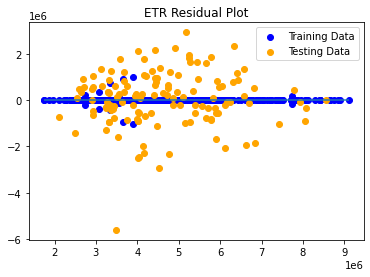

In [38]:
# Plot the residuals for the training and testing data.
plt.scatter(ETRmodel.predict(X_train_scaled), ETRmodel.predict(X_train_scaled) - y_train, c="blue", label="Training Data")
plt.scatter(ETRmodel.predict(X_test_scaled), ETRmodel.predict(X_test_scaled) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("ETR Residual Plot")
plt.show()

In [39]:
from sklearn.neighbors import KNeighborsRegressor

# Create KNeighborsRegressor model with default settings
KNRmodel = KNeighborsRegressor()

# Fit the model to the training data, and calculate the scores for the training and testing data.
KNRmodel.fit(X_train_scaled, y_train)
training_score = KNRmodel.score(X_train_scaled, y_train)
testing_score = KNRmodel.score(X_test_scaled, y_test)

In [40]:
# Print training and test score for KNR model
print(training_score, testing_score)

0.7057216434902274 0.47649117688438936


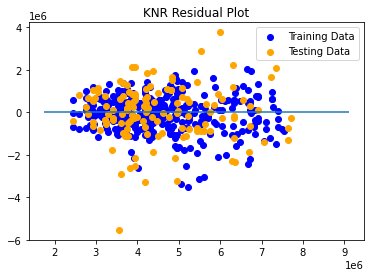

In [41]:
# Plot the residuals for the training and testing data.
plt.scatter(KNRmodel.predict(X_train_scaled), KNRmodel.predict(X_train_scaled) - y_train, c="blue", label="Training Data")
plt.scatter(KNRmodel.predict(X_test_scaled), KNRmodel.predict(X_test_scaled) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("KNR Residual Plot")
plt.show()

In [42]:
from sklearn.linear_model import ElasticNet

# Create an ElasticNet model with default settings
ENmodel = ElasticNet()

# Fit the model to the training data, and calculate the scores for the training and testing data.
ENmodel.fit(X_train_scaled, y_train)
training_score = ENmodel.score(X_train_scaled, y_train)
testing_score = ENmodel.score(X_test_scaled, y_test)

In [43]:
# Print training and test score for ElasticNet model
print(training_score, testing_score)

0.6279096860604182 0.5684162410024651


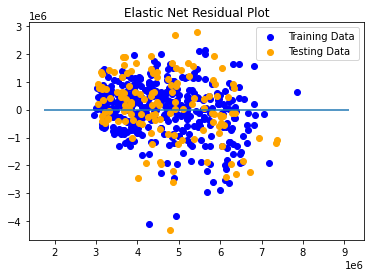

In [44]:
# Plot the residuals for the training and testing data.
plt.scatter(ENmodel.predict(X_train_scaled), ENmodel.predict(X_train_scaled) - y_train, c="blue", label="Training Data")
plt.scatter(ENmodel.predict(X_test_scaled), ENmodel.predict(X_test_scaled) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Elastic Net Residual Plot")
plt.show()

In [45]:
from sklearn.ensemble import AdaBoostRegressor

# Create an AdaBoostRegressor model with default settings
ABRmodel = AdaBoostRegressor()

# Fit the model to the training data, and calculate the scores for the training and testing data.
ABRmodel.fit(X_train_scaled, y_train)
training_score = ABRmodel.score(X_train_scaled, y_train)
testing_score = ABRmodel.score(X_test_scaled, y_test)

In [46]:
# Print training and test score for AdaBoostRegressor model
print(training_score, testing_score)

0.6863779231781504 0.523781402713808


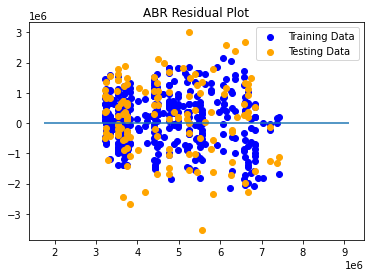

In [47]:
# Plot the residuals for the training and testing data.
plt.scatter(ABRmodel.predict(X_train_scaled), ABRmodel.predict(X_train_scaled) - y_train, c="blue", label="Training Data")
plt.scatter(ABRmodel.predict(X_test_scaled), ABRmodel.predict(X_test_scaled) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("ABR Residual Plot")
plt.show()

In [48]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(397, 15) (133, 15) (397,) (133,)
